# INTRODUCTION
## Analysis 1: Churn Modelling

- This analysis is one of the analyses that were performed within the scope of the research on "Comparing the Performance of Machine Learning Algorithms on Balanced and Imbalanced Datasets".
- Semih Gencturk - Yildiz Technical Unversity - Graduation Thesis - Advisor: Prof. Dr. Inci Albayrak - 2024

# CONTENTS

1. Getting Started
2. About Dataset
3. Applying Algorithms
4. Comparing Results
5. Conclusion

# 1. GETTING STARTED

## Install Packages

In [1]:
# install the neccessary packages

# for reading data and formatting information from Excel files
!pip install xlrd 
# to read/write Excel 2010 xlsx/xlsm/xltx/xltm files
!pip install openpyxl 
# Python visualization library based on matplotlib
!pip install seaborn  
# Python module for machine learning built on top of SciPy
!pip install scikit-learn 
# Toolbox for imbalanced dataset in machine learning
!pip install imblearn

## Import Libraries

In [2]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import time
from sklearn import metrics, preprocessing, model_selection
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

In [3]:
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook

# 2. ABOUT DATASET

- Churn Modelling dataset is avaliable on Kaggle: [Here is the link of dataset on kaggle.com](https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling)
- The business case is to predict whether the customer left the bank (closed his account) or he continues to be a customer.
- There are 10000 records and 14 columns.
- Columns 'RowNumber', 'CustomerId' and 'Surname' are not necessary for our use case, hence they will be dropped. There is also the target column, which is called 'Exited'. So, we have 10 features in this dataset.
- In the dataset, 80% of the customers left the bank, while 20% of them continued to be a customer. So, we have an imbalanced dataset.

|#|Attribute|Explanation|
|--|--|--|
|1|**CustomerId**|An unique number represents to a customer|
|2|**Surname**|Surname of the customer|
|3|**CreditScore** |Credit score of the customer|
|4|**Geography** |The country from which the customer belongs|
|5|**Gender** |The gender of the customer (male or female)|
|6|**Age** |Age of the customer|
|7|**Tenure** |Number of years for which the customer has been with the bank|
|8|**Balance** |Bank balance of the customer|
|9|**NumOfProducts** |Number of bank products the customer is utilising|
|10|**HasCrCard** |Binary Flag for whether the customer holds a credit card with the bank or not|
|11|**IsActiveMember** |Binary Flag for whether the customer is an active member with the bank or not|
|12|**EstimatedSalary** |Estimated salary of the customer in Dollars|
|13|**Exited** |Binary flag 1 if the customer closed account with bank and 0 if the customer is retained|

## Loading The Data

In [4]:
# load the data file
df = pd.read_excel('./Churn_Modelling.xlsx')

# look at the data
print("Column names:")
print(df.columns.tolist(),'\n')

print('Data dimensions:',df.shape,'\n')

print("Sample 10 data from the dataset:")
df.head(10)

Column names:
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'] 

Data dimensions: (10000, 14) 

Sample 10 data from the dataset:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## Checking The Data

### Checking missing values:

In [5]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

**Conclusion:** There are no missing values.

### Checking duplicate records:

In [6]:
df[df.duplicated(keep='first')]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


**Conclusion:** There are no duplicate records.

## Exploring The Data

### Examaning Distribution of The Data

In [7]:
print('Number of customers who left the bank = {}'.format(len(df[df['Exited'] == 1])))
print('Number of customers who stayed in the bank = {}'.format(len(df[df['Exited'] == 0])))
print('Percentage of customers who left the bank = {}%'.format(round(float(len(df[df['Exited'] == 1])) / len(df) * 100), 3))
print('Percentage of customers who stayed in the bank = {}%'.format(round(float(len(df[df['Exited'] == 0])) / len(df) * 100), 3))

Number of customers who left the bank = 2037
Number of customers who stayed in the bank = 7963
Percentage of customers who left the bank = 20%
Percentage of customers who stayed in the bank = 80%


<Axes: xlabel='Exited', ylabel='count'>

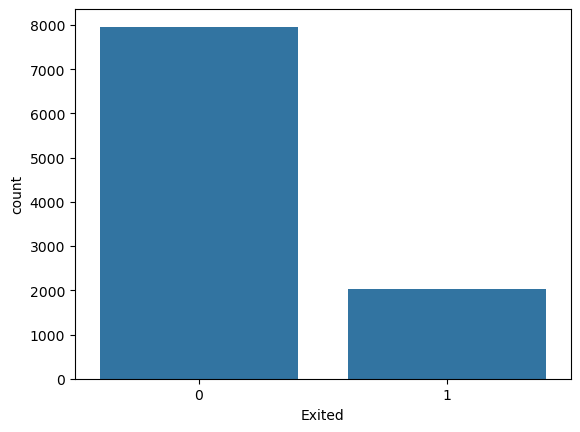

In [8]:
# display these values also in a chart
sns.countplot(x='Exited', data=df)

**Conclusion**: The data is Imbalanced.

## Preparation of The Data

In [9]:
# Creating dummy variables for categorical attributes 

# In the dataset, there are two categorical variables: Geography and Gender.
# They should be encoded to numbers.

# Copy the dataset for encoding categorical variables.
df_copy1 = df.copy()

# Prepend strings, so that they can be understandable
df_copy1['Geography'] = 'geo_' + df_copy1['Geography'].astype(str)
df_copy1['Gender'] = 'gender_' + df_copy1['Gender'].astype(str)

# Create 'Geography' dummies and join
geo_dummies = pd.get_dummies(df_copy1['Geography'])
df_copy1 = df_copy1.join(geo_dummies)

# Create 'Gender' dummies and join
gender_dummies = pd.get_dummies(df_copy1['Gender'])
df_copy1 = df_copy1.join(gender_dummies)

df_copy1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,geo_France,geo_Germany,geo_Spain,gender_Female,gender_Male
0,1,15634602,Hargrave,619,geo_France,gender_Female,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,2,15647311,Hill,608,geo_Spain,gender_Female,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,3,15619304,Onio,502,geo_France,gender_Female,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,4,15701354,Boni,699,geo_France,gender_Female,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,5,15737888,Mitchell,850,geo_Spain,gender_Female,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


**As you can see, there are 19 columns but we should drop 'Geography' and 'Gender' columns, because they are already represented in seperate columns starting with 'Geography_' and 'Gender_'.** 

In [10]:
df_copy1.drop(['Geography', 'Gender'], axis=1, inplace=True)

In [11]:
df_copy1.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,geo_France,geo_Germany,geo_Spain,gender_Female,gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [12]:
# Remove 'RowNumber', 'CustomerId', and 'Surname' since they don't mean anything for the analysis
# Remove 'Exited' since it is the target column
# Remove 'gender_Male' and 'geo_France' to prevent dummy variable trap
# The Dummy Variable Trap occurs when different  input variables perfectly predict each other – leading to multicollinearity

x = df_copy1.drop(['RowNumber','CustomerId', 'Surname', 'Exited','gender_Male', 'geo_France'], axis=1)
y = df_copy1.Exited # target feature

# 3. APPLYING ALGORITHMS

In [13]:
seed = 40
test_size = 0.25

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = seed)

print('Train data:', x_train.shape)
print('Test data :', x_test.shape)

Train data: (7500, 11)
Test data : (2500, 11)


In [14]:
# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print(x_train)

[[ 0.32480926 -0.65875048 -1.03485372 ...  1.73328336 -0.57201287
  -0.91284861]
 [ 0.06629976 -0.17961741  0.34913396 ... -0.57693971 -0.57201287
   1.09547189]
 [-0.8333133  -0.94623032 -0.34285988 ... -0.57693971 -0.57201287
   1.09547189]
 ...
 [ 0.70740332 -0.56292386  0.69513088 ... -0.57693971  1.74821241
   1.09547189]
 [-0.15084822 -0.27544402 -1.38085064 ... -0.57693971  1.74821241
   1.09547189]
 [ 0.4592342  -0.75457709  0.00313704 ... -0.57693971  1.74821241
   1.09547189]]


## 3.1. Logistic Regression

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      2011
           1       0.58      0.25      0.35       489

    accuracy                           0.82      2500
   macro avg       0.71      0.60      0.62      2500
weighted avg       0.79      0.82      0.79      2500



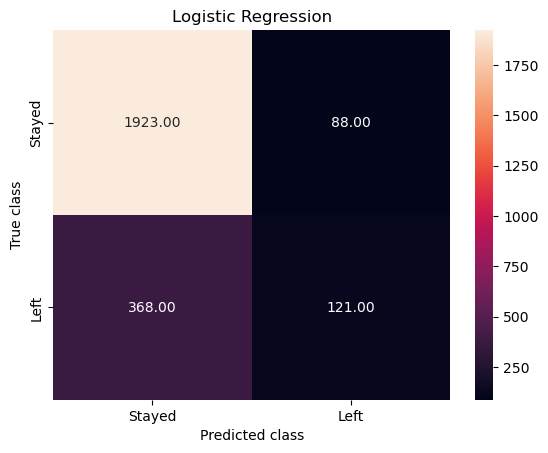

In [15]:
# Fitting Logistic Regression to the training set
lr_classifier = LogisticRegression(random_state = seed)
lr_classifier.fit(x_train, y_train)

# Printing the training score
rf_training_score = lr_classifier.score(x_train, y_train)
#print("Training score: ", rf_training_score)

# Predicting the test set results
y_pred = lr_classifier.predict(x_test)

# Printing the Classification report
print(classification_report(y_test, y_pred))

# Printing the Confusion Matrix
def print_confusion_matrix(y_test, y_pred, title):
    cm = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Stayed", "Left"], yticklabels = ["Stayed", "Left"] )
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.title(title)
    
print_confusion_matrix(y_test, y_pred, 'Logistic Regression')

In [16]:
def apply_grid_search(estimator, parameters, scoring, x_train, y_train):
    # StratifiedKFold: a variation of K-Fold Cross-Validation that ensures each fold maintains 
    # the same proportion of observations for each target class as the complete dataset
    kfold = StratifiedKFold(n_splits = 10, shuffle=True, random_state = seed)
    grid_search = GridSearchCV(estimator = estimator,
                               param_grid = parameters,
                               scoring = scoring, # it can be the accuracy, it can be the precision, it can be the recall etc.
                               cv = kfold,
                               verbose = 1, # for printing the internal logs
                               n_jobs = -1) # use all the processors
    grid_search = grid_search.fit(x_train, y_train)

    # now look at the results
    print("Training - best score: ", grid_search.best_score_)
    print("Training - best parameters: ", grid_search.best_params_)
    
    return grid_search
    
# Applying Grid Search to find the best model and the best parameters
lr_grid_search_parameters = [{'C':[0.1, 1, 10, 100, 1000],
                              'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
                              'penalty':['l1', 'l2']}]

scoring = 'f1_weighted'
lr_grid_search = apply_grid_search(lr_classifier, lr_grid_search_parameters, scoring, x_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Training - best score:  0.7701078750296164
Training - best parameters:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


              precision    recall  f1-score   support

           0       0.84      0.96      0.89      2011
           1       0.58      0.25      0.34       489

    accuracy                           0.82      2500
   macro avg       0.71      0.60      0.62      2500
weighted avg       0.79      0.82      0.79      2500



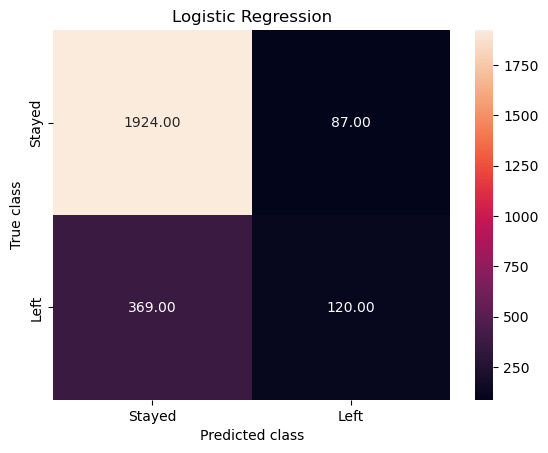

In [17]:
# Predicting the test set results
y_pred = lr_grid_search.predict(x_test)

# Printing the Classification report
print(classification_report(y_test, y_pred))

# Printing the Confusion Matrix
print_confusion_matrix(y_test, y_pred, 'Logistic Regression')

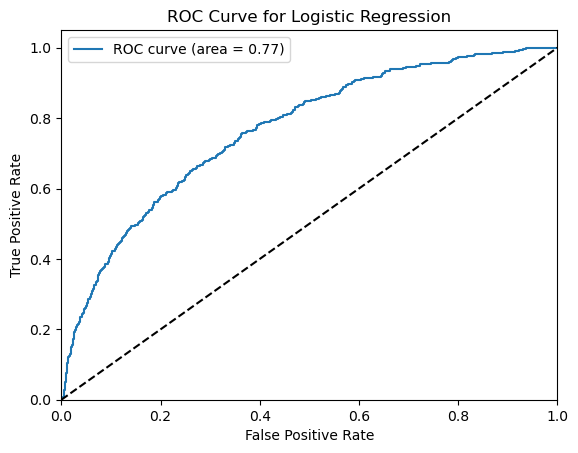

In [18]:
def printROCCurve(x_test, y_test, grid_search, label):
    # Predict probabilities on the test set
    y_pred_proba = grid_search.predict_proba(x_test)[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.figure()  
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(label)
    plt.legend()
    plt.show()

printROCCurve(x_test, y_test, lr_grid_search, 'ROC Curve for Logistic Regression')

f1=0.345 auc=0.446


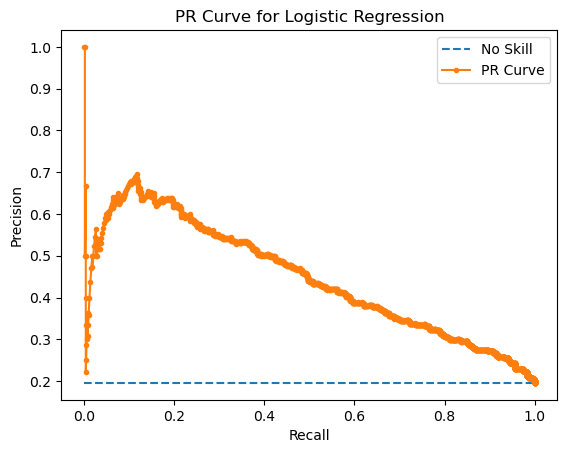

In [19]:
def printPRCurve(x_test, y_test, grid_search, label):
    # Predict probabilities on the test set
    y_pred_proba = grid_search.predict_proba(x_test)[:, 1]
    
    # predict class values
    yhat = grid_search.predict(x_test)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    f1, _auc = f1_score(y_test, yhat), auc(recall, precision)
    # summarize scores
    print('f1=%.3f auc=%.3f' % (f1, _auc))
    
    # Plot the precision-recall curve
    no_skill = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.plot(recall, precision, marker='.', label='PR Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(label)
    plt.legend()
    plt.show()
    
printPRCurve(x_test, y_test, lr_grid_search, 'PR Curve for Logistic Regression')

## 3.2 K-Nearest Neighbors (K-NN)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2011
           1       0.60      0.37      0.46       489

    accuracy                           0.83      2500
   macro avg       0.73      0.66      0.68      2500
weighted avg       0.81      0.83      0.81      2500



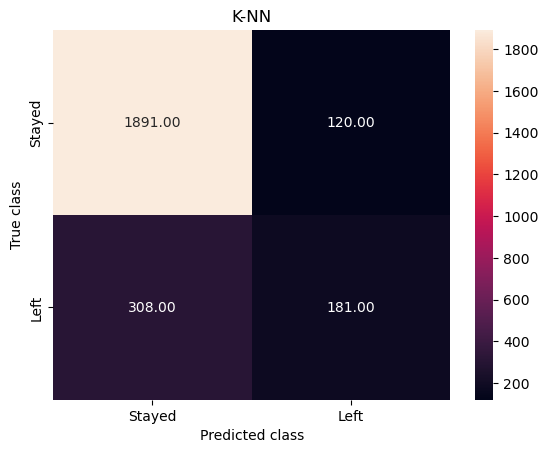

In [20]:
# Fitting K-NN to the Training set
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = knn_classifier.predict(x_test)

# Predicting the Test set results
y_pred = knn_classifier.predict(x_test)

# Printing the Classification report
print(classification_report(y_test, y_pred))

# Printing the Confusion Matrix
print_confusion_matrix(y_test, y_pred, 'K-NN')

In [21]:
# Applying Grid Search to find the best model and the best parameters
knn_grid_search_parameters = [{'weights': ['uniform', 'distance'],  
                               'p': [1, 2], #  p = 1 means Manhattan Distance, p = 2 means Euclidean Distance
                               'metric': ['minkowski', 'str']}]

knn_grid_search = apply_grid_search(knn_classifier, knn_grid_search_parameters, scoring, x_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Training - best score:  0.8078618927897645
Training - best parameters:  {'metric': 'minkowski', 'p': 1, 'weights': 'distance'}


              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2011
           1       0.62      0.39      0.48       489

    accuracy                           0.83      2500
   macro avg       0.74      0.66      0.69      2500
weighted avg       0.82      0.83      0.82      2500



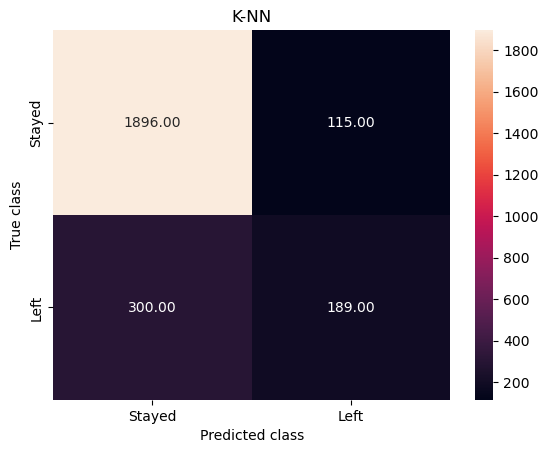

In [22]:
# Predicting the test set results
y_pred = knn_grid_search.predict(x_test)

# Printing the Classification report
print(classification_report(y_test, y_pred))

# Printing the Confusion Matrix
print_confusion_matrix(y_test, y_pred, 'K-NN')

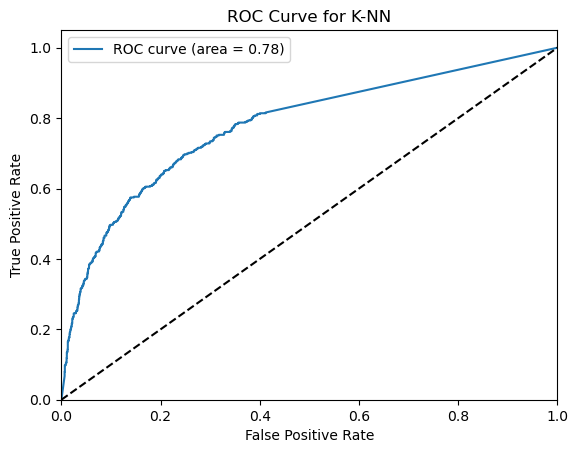

f1=0.477 auc=0.527


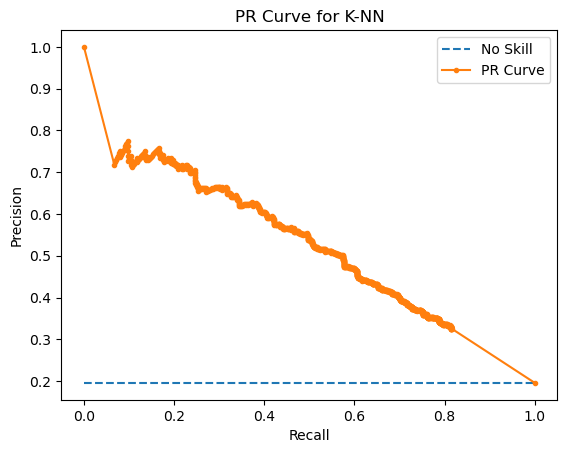

In [23]:
# Print ROC Curve
printROCCurve(x_test, y_test, knn_grid_search, 'ROC Curve for K-NN')

# Print PR Curve
printPRCurve(x_test, y_test, knn_grid_search, 'PR Curve for K-NN')

### 3.3 Random Forest

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      2011
           1       0.74      0.43      0.54       489

    accuracy                           0.86      2500
   macro avg       0.81      0.70      0.73      2500
weighted avg       0.85      0.86      0.84      2500



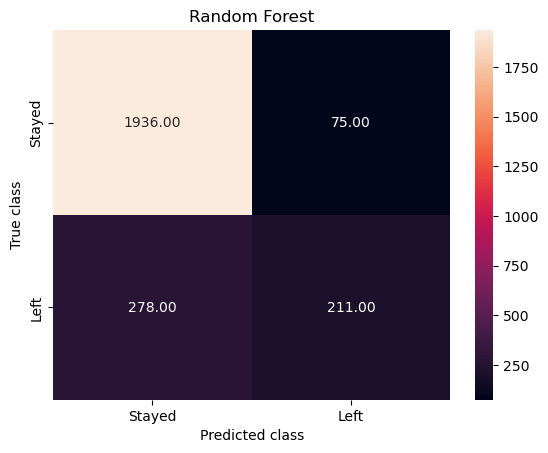

In [24]:
# Fitting Random Forest Classification to the Training set
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = seed)
rf_classifier.fit(x_train, y_train)

# Printing the training score
rf_training_score = rf_classifier.score(x_train, y_train)
#print("Training score: ", rf_training_score)

# Predicting the Test set results
y_pred = rf_classifier.predict(x_test)

# Printing the Classification report
print(classification_report(y_test, y_pred))

# Printing the Confusion Matrix
print_confusion_matrix(y_test, y_pred, 'Random Forest')

In [25]:
# Applying Grid Search to find the best model and the best parameters
rf_grid_search_parameters = [{'criterion'       : ['gini', 'entropy'],
                              'min_samples_split': [4, 6],
                              'max_features'     : ['sqrt', 'log2'],
                              'max_depth'        : [5, 10, 20],
                              'n_estimators'     : [50, 100]}]

rf_grid_search = apply_grid_search(rf_classifier, rf_grid_search_parameters, scoring, x_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Training - best score:  0.8493923013994751
Training - best parameters:  {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 6, 'n_estimators': 50}


              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2011
           1       0.75      0.49      0.59       489

    accuracy                           0.87      2500
   macro avg       0.82      0.73      0.76      2500
weighted avg       0.86      0.87      0.86      2500



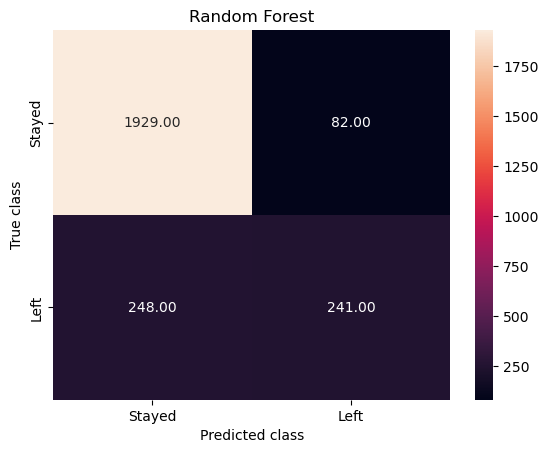

In [26]:
# Predicting the test set results
y_pred = rf_grid_search.predict(x_test)

# Printing the Classification report
print(classification_report(y_test, y_pred))

# Printing the Confusion Matrix
print_confusion_matrix(y_test, y_pred, 'Random Forest')

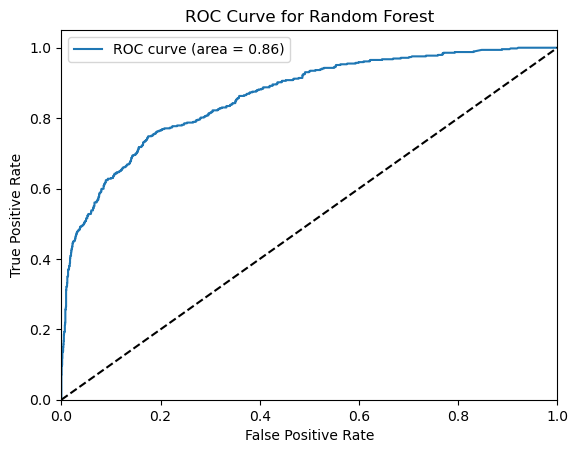

f1=0.594 auc=0.685


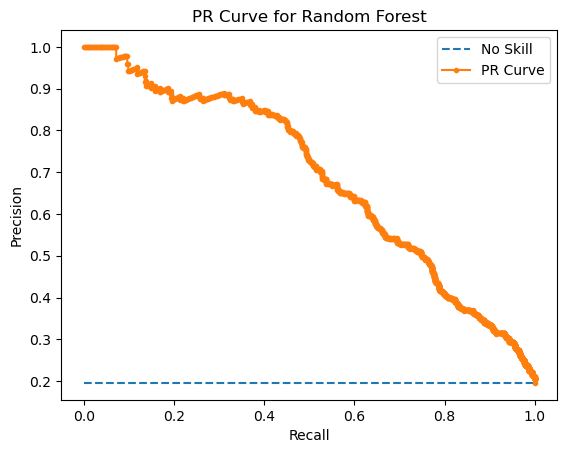

In [27]:
# Print ROC Curve
printROCCurve(x_test, y_test, rf_grid_search, 'ROC Curve for Random Forest')

# Print PR Curve
printPRCurve(x_test, y_test, rf_grid_search, 'PR Curve for Random Forest')

## 4. Using SMOTE Algorithm for Oversampling

In [28]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0))) 
   
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x, y.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(x_resampled.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_resampled.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_resampled == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_resampled == 0))) 

Before OverSampling, counts of label '1': 2037
Before OverSampling, counts of label '0': 7963 

After OverSampling, the shape of train_X: (6484, 11)
After OverSampling, the shape of train_y: (6484,) 

After OverSampling, counts of label '1': 3625
After OverSampling, counts of label '0': 2859


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = test_size, random_state = seed)

print('Train data:', x_train.shape)
print('Test data :', x_test.shape)

Train data: (4863, 11)
Test data : (1621, 11)


In [30]:
# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print(x_train)

[[ 0.24503157 -1.04871229  1.55839207 ... -0.80701508 -0.63710098
   0.81712635]
 [-0.08617893  0.89064144  0.43991015 ... -0.80701508 -0.63710098
   0.81712635]
 [-0.13959998  2.42171017  0.81273746 ... -0.80701508 -0.63710098
   0.81712635]
 ...
 [ 0.07408422 -1.86528229 -0.67857176 ...  1.23913421  1.56960989
   0.81712635]
 [-2.03070509  1.19685519 -1.05139907 ... -0.80701508  1.56960989
   0.81712635]
 [ 2.16818931  1.40099768 -1.79705368 ...  1.23913421 -0.63710098
  -1.22380094]]


              precision    recall  f1-score   support

           0       0.77      0.75      0.76       684
           1       0.82      0.83      0.83       937

    accuracy                           0.80      1621
   macro avg       0.79      0.79      0.79      1621
weighted avg       0.80      0.80      0.80      1621



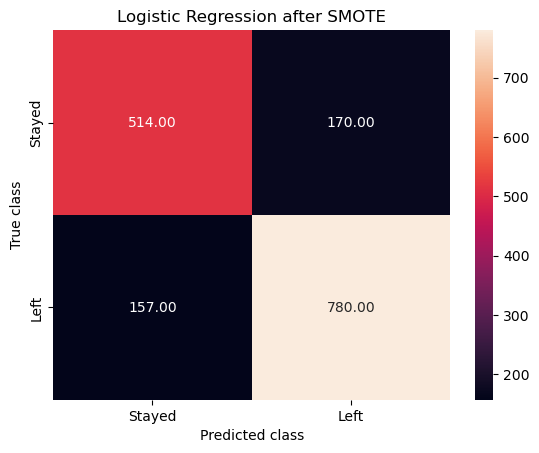

In [31]:
# Fitting Logistic Regression to the training set
lr2_classifier = LogisticRegression(random_state = seed)
lr2_classifier.fit(x_train, y_train)

# Printing the training score
lr2_training_score = lr2_classifier.score(x_train, y_train)
#print("Training score: ", rf_training_score)

# Predicting the test set results
y_pred = lr2_classifier.predict(x_test)

# Printing the Classification report
print(classification_report(y_test, y_pred))

# Printing the Confusion Matrix   
print_confusion_matrix(y_test, y_pred, 'Logistic Regression after SMOTE')

In [32]:
scoring = 'accuracy'
# Applying Grid Search to find the best model and the best parameters
lr2_grid_search = apply_grid_search(lr2_classifier, lr_grid_search_parameters, scoring, x_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Training - best score:  0.8130643648439678
Training - best parameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


              precision    recall  f1-score   support

           0       0.77      0.76      0.76       684
           1       0.83      0.83      0.83       937

    accuracy                           0.80      1621
   macro avg       0.80      0.80      0.80      1621
weighted avg       0.80      0.80      0.80      1621



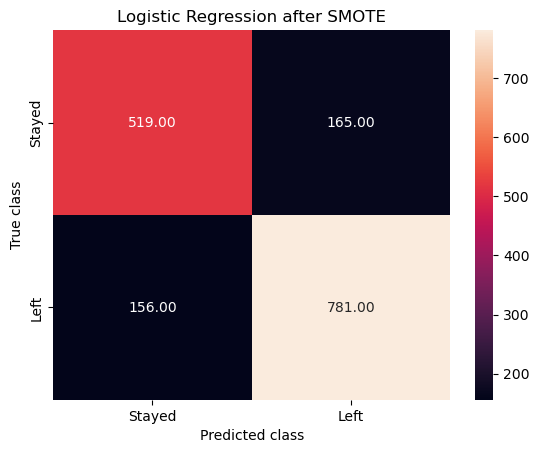

In [33]:
# Predicting the test set results
y_pred = lr2_grid_search.predict(x_test)

# Printing the Classification report
print(classification_report(y_test, y_pred))

# Printing the Confusion Matrix
print_confusion_matrix(y_test, y_pred, 'Logistic Regression after SMOTE')

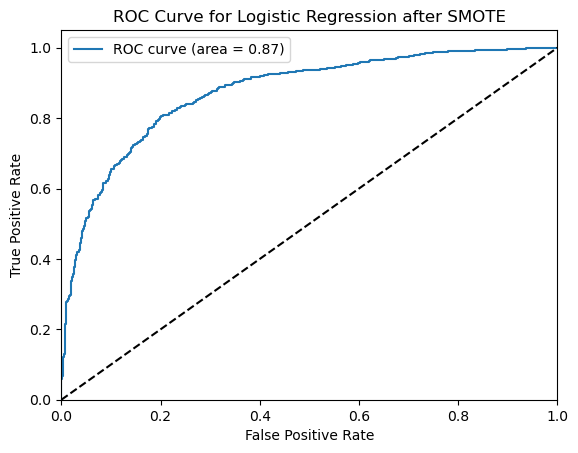

f1=0.830 auc=0.902


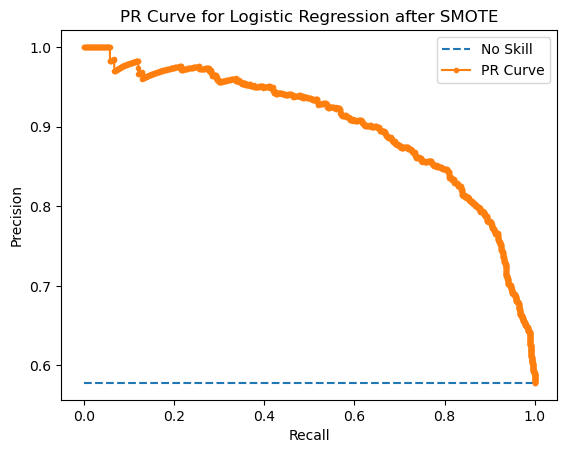

In [34]:
# Print ROC Curve
printROCCurve(x_test, y_test, lr2_grid_search, 'ROC Curve for Logistic Regression after SMOTE')

# Print PR Curve
printPRCurve(x_test, y_test, lr2_grid_search, 'PR Curve for Logistic Regression after SMOTE')

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       684
           1       0.88      0.86      0.87       937

    accuracy                           0.85      1621
   macro avg       0.85      0.85      0.85      1621
weighted avg       0.86      0.85      0.85      1621



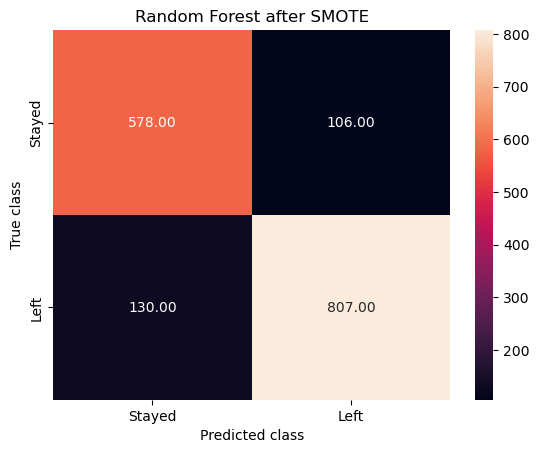

In [35]:
# Fitting Random Forest Classification to the Training set
rf2_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = seed)
rf2_classifier.fit(x_train, y_train)

# Printing the training score
rf2_training_score = rf2_classifier.score(x_train, y_train)
#print("Training score: ", rf_training_score)

# Predicting the Test set results
y_pred = rf2_classifier.predict(x_test)

# Printing the Classification report
print(classification_report(y_test, y_pred))

# Printing the Confusion Matrix
print_confusion_matrix(y_test, y_pred, 'Random Forest after SMOTE')

In [36]:
# Applying Grid Search to find the best model and the best parameters
rf2_grid_search = apply_grid_search(rf2_classifier, rf_grid_search_parameters, scoring, x_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Training - best score:  0.8856736042453589
Training - best parameters:  {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 50}


              precision    recall  f1-score   support

           0       0.85      0.85      0.85       684
           1       0.89      0.89      0.89       937

    accuracy                           0.87      1621
   macro avg       0.87      0.87      0.87      1621
weighted avg       0.87      0.87      0.87      1621



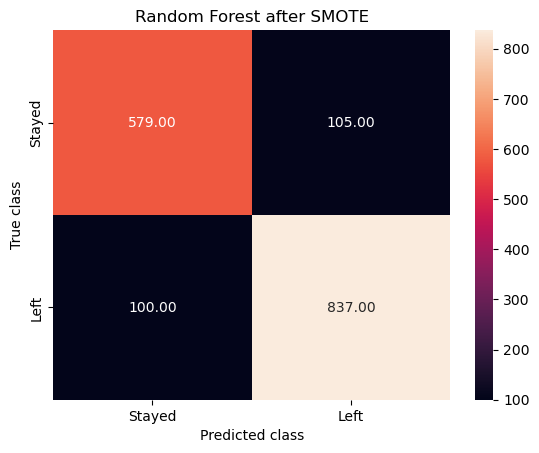

In [37]:
# Predicting the test set results
y_pred = rf2_grid_search.predict(x_test)

# Printing the Classification report
print(classification_report(y_test, y_pred))

# Printing the Confusion Matrix
print_confusion_matrix(y_test, y_pred, 'Random Forest after SMOTE')

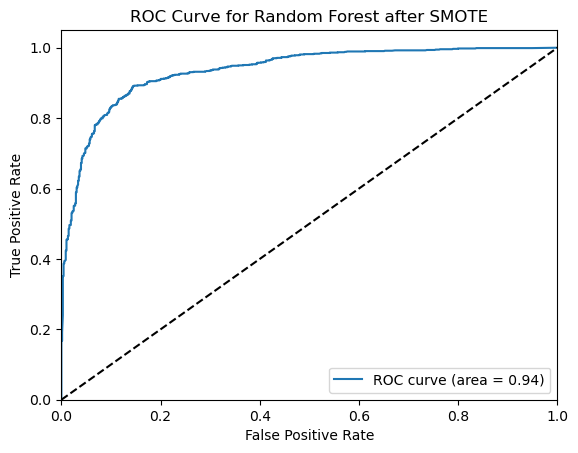

f1=0.891 auc=0.952


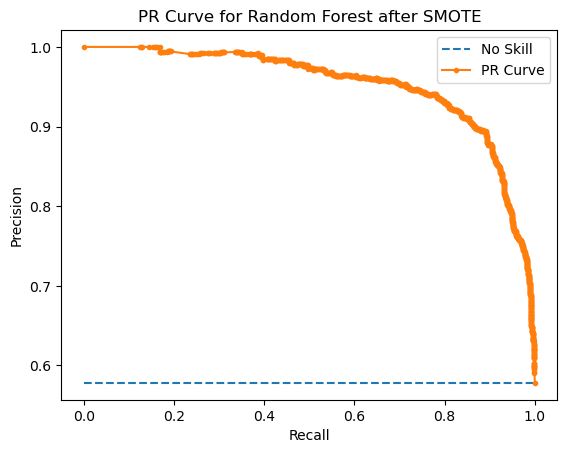

In [38]:
# Print ROC Curve
printROCCurve(x_test, y_test, rf2_grid_search, 'ROC Curve for Random Forest after SMOTE')

# Print PR Curve
printPRCurve(x_test, y_test, rf2_grid_search, 'PR Curve for Random Forest after SMOTE')

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       684
           1       0.84      0.85      0.85       937

    accuracy                           0.82      1621
   macro avg       0.82      0.82      0.82      1621
weighted avg       0.82      0.82      0.82      1621



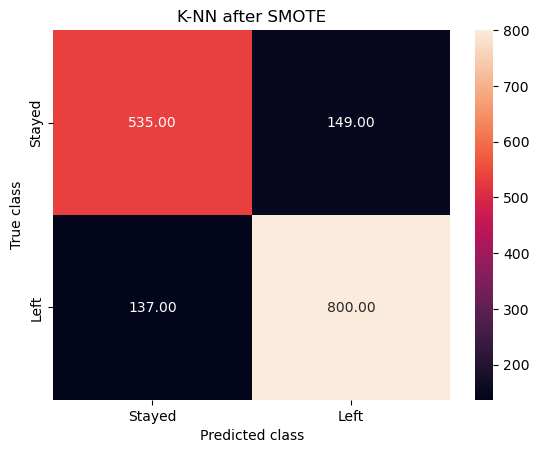

In [39]:
# Fitting K-NN to the Training set
knn2_classifier = KNeighborsClassifier()
knn2_classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = knn2_classifier.predict(x_test)

# Predicting the Test set results
y_pred = knn2_classifier.predict(x_test)

# Printing the Classification report
print(classification_report(y_test, y_pred))

# Printing the Confusion Matrix
print_confusion_matrix(y_test, y_pred, 'K-NN after SMOTE')

In [40]:
# Applying Grid Search to find the best model and the best parameters
knn2_grid_search = apply_grid_search(knn2_classifier, knn_grid_search_parameters, scoring, x_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Training - best score:  0.8605800187593481
Training - best parameters:  {'metric': 'minkowski', 'p': 1, 'weights': 'distance'}


              precision    recall  f1-score   support

           0       0.86      0.79      0.82       684
           1       0.85      0.90      0.88       937

    accuracy                           0.85      1621
   macro avg       0.85      0.84      0.85      1621
weighted avg       0.85      0.85      0.85      1621



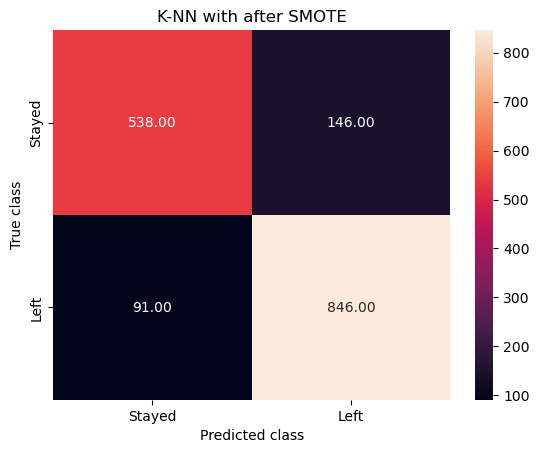

In [41]:
# Predicting the test set results
y_pred = knn2_grid_search.predict(x_test)

# Printing the Classification report
print(classification_report(y_test, y_pred))

# Printing the Confusion Matrix
print_confusion_matrix(y_test, y_pred, 'K-NN with after SMOTE')

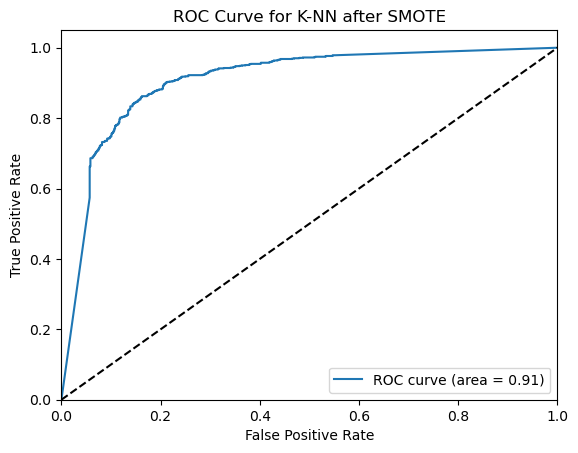

f1=0.877 auc=0.928


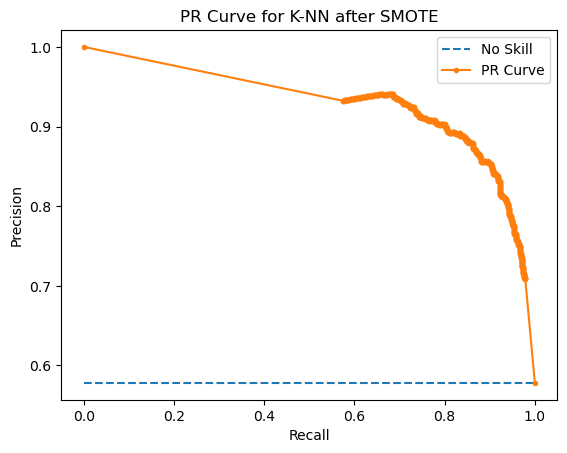

In [42]:
# Print ROC Curve
printROCCurve(x_test, y_test, knn2_grid_search, 'ROC Curve for K-NN after SMOTE')

# Print PR Curve
printPRCurve(x_test, y_test, knn2_grid_search, 'PR Curve for K-NN after SMOTE')